In [48]:
# Importing dataset

In [49]:
import pandas as pd

In [50]:
dataset = pd.read_csv('datasets/wines.csv')

In [51]:
dataset.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
import seaborn as sns

In [53]:
# sns.heatmap(dataset.isnull(), cmap="Spectral")

In [54]:
dataset.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [73]:
X.shape

(178, 13)

In [55]:
y = dataset.Class

In [56]:
X = dataset[[ 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline' ]]

In [57]:
# X

<Axes: xlabel='Alcohol', ylabel='Class'>

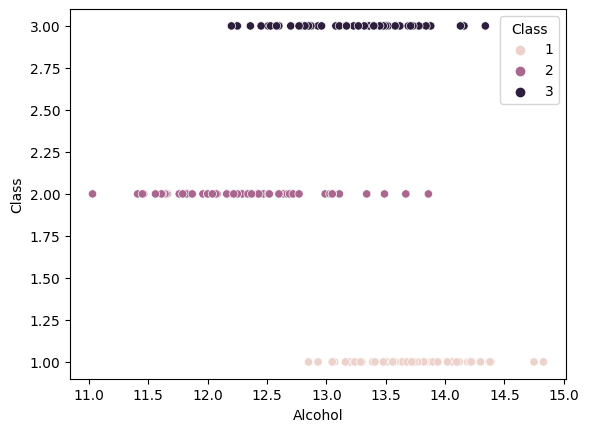

In [58]:
sns.scatterplot(data=dataset, x='Alcohol', y='Class', hue=y)

In [59]:
# check how many categories are there for y

In [60]:
y.value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [61]:
# Now do dummy varibales or one hot encoding and for y no need of removing the dummy variable trap

In [62]:
# convert y to dataframe so that we can get dummy varibales

In [67]:
y_final = pd.get_dummies(y, dtype=int)

In [68]:
y_final

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [69]:
# now create the model

In [170]:
from keras.models import Sequential

In [314]:
model = Sequential()

In [315]:
from keras.layers import Dense

In [316]:
model.add(
    Dense(
        units=8,
        activation="relu",
        input_shape=(13,),
        
      )
)

In [317]:
# model.get_config()

In [318]:
# model.summary()

In [319]:
model.add(
    Dense(
        units=7,
        activation="relu",

    )
)

In [320]:
model.add(
    Dense(
        units=6,
        activation="relu",

    )
)

In [321]:
model.add(
    Dense(
        units=6,
        activation="relu",


    )
)

In [322]:
model.add(
    Dense(
        units=6,
        activation="relu",

    )
)

In [323]:
# model.add(
#     Dense(
#         units=5,
#         activation="relu",
#          kernel_initializer='zeros',

#     )
# )

In [324]:
# model.add(
#     Dense(
#         units=5,
#         activation="relu",
#          kernel_initializer='zeros',
#         bias_initializer='zeros'
#     )
# )

In [325]:
model.add(
    Dense(
        units=4,
        activation="relu",


    )
)

In [326]:
# model.add(
#     Dense(
#         units=3,
#         activation="relu",
#          kernel_initializer='zeros',

#     )
# )

In [327]:
model.add(
    Dense(
        units=3,
        activation="softmax",
         kernel_initializer='zeros',

    )
)

In [328]:
model.compile( 
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics='accuracy'
)

In [329]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 8)                 112       
                                                                 
 dense_117 (Dense)           (None, 7)                 63        
                                                                 
 dense_118 (Dense)           (None, 6)                 48        
                                                                 
 dense_119 (Dense)           (None, 6)                 42        
                                                                 
 dense_120 (Dense)           (None, 6)                 42        
                                                                 
 dense_121 (Dense)           (None, 4)                 28        
                                                                 
 dense_122 (Dense)           (None, 3)               

In [330]:
model.fit(X, y_final, epochs=600)

Epoch 1/600
6/6 [==============================] - 3s 5ms/step - loss: 1.0611 - accuracy: 0.3315
Epoch 2/600
6/6 [==============================] - 0s 7ms/step - loss: 1.0461 - accuracy: 0.3315
Epoch 3/600
6/6 [==============================] - 0s 7ms/step - loss: 1.0230 - accuracy: 0.3315
Epoch 4/600
6/6 [==============================] - 0s 8ms/step - loss: 1.0059 - accuracy: 0.3371
Epoch 5/600
6/6 [==============================] - 0s 7ms/step - loss: 0.9886 - accuracy: 0.3876
Epoch 6/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9754 - accuracy: 0.5393
Epoch 7/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9428 - accuracy: 0.5674
Epoch 8/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9204 - accuracy: 0.5449
Epoch 9/600
6/6 [==============================] - 0s 6ms/step - loss: 0.8947 - accuracy: 0.6011
Epoch 10/600
6/6 [==============================] - 0s 6ms/step - loss: 0.8669 - accuracy: 0.6067
Epoch 11/600
6/6 [===========

6/6 [==============================] - 0s 7ms/step - loss: 0.6202 - accuracy: 0.7079
Epoch 85/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6218 - accuracy: 0.7079
Epoch 86/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6252 - accuracy: 0.6798
Epoch 87/600
6/6 [==============================] - 0s 8ms/step - loss: 0.6147 - accuracy: 0.6966
Epoch 88/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6910
Epoch 89/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.6685
Epoch 90/600
6/6 [==============================] - 0s 7ms/step - loss: 0.6108 - accuracy: 0.6910
Epoch 91/600
6/6 [==============================] - 0s 10ms/step - loss: 0.6366 - accuracy: 0.6685
Epoch 92/600
6/6 [==============================] - 0s 9ms/step - loss: 0.6316 - accuracy: 0.7079
Epoch 93/600
6/6 [==============================] - 0s 8ms/step - loss: 0.6122 - accuracy: 0.6854
Epoch 94/600
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.5884 - accuracy: 0.7191
Epoch 167/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.7079
Epoch 168/600
6/6 [==============================] - 0s 5ms/step - loss: 0.5876 - accuracy: 0.7022
Epoch 169/600
6/6 [==============================] - 0s 7ms/step - loss: 0.5790 - accuracy: 0.6966
Epoch 170/600
6/6 [==============================] - 0s 8ms/step - loss: 0.5767 - accuracy: 0.7022
Epoch 171/600
6/6 [==============================] - 0s 11ms/step - loss: 0.5886 - accuracy: 0.7247
Epoch 172/600
6/6 [==============================] - 0s 10ms/step - loss: 0.5821 - accuracy: 0.7191
Epoch 173/600
6/6 [==============================] - 0s 10ms/step - loss: 0.5831 - accuracy: 0.6854
Epoch 174/600
6/6 [==============================] - 0s 11ms/step - loss: 0.5706 - accuracy: 0.7360
Epoch 175/600
6/6 [==============================] - 0s 11ms/step - loss: 0.5789 - accuracy: 0.7472
Epoch 176/600
6/6 [

6/6 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7416
Epoch 249/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.7079
Epoch 250/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5340 - accuracy: 0.7135
Epoch 251/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5378 - accuracy: 0.7472
Epoch 252/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5338 - accuracy: 0.7135
Epoch 253/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7303
Epoch 254/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7191
Epoch 255/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 0.7022
Epoch 256/600
6/6 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.7416
Epoch 257/600
6/6 [==============================] - 0s 5ms/step - loss: 0.5336 - accuracy: 0.7135
Epoch 258/600
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.3714 - accuracy: 0.8764
Epoch 331/600
6/6 [==============================] - 0s 6ms/step - loss: 0.4008 - accuracy: 0.8483
Epoch 332/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8371
Epoch 333/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8483
Epoch 334/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3719 - accuracy: 0.8708
Epoch 335/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3604 - accuracy: 0.8483
Epoch 336/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3504 - accuracy: 0.8708
Epoch 337/600
6/6 [==============================] - 0s 6ms/step - loss: 0.3396 - accuracy: 0.8483
Epoch 338/600
6/6 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.8933
Epoch 339/600
6/6 [==============================] - 0s 8ms/step - loss: 0.3245 - accuracy: 0.8933
Epoch 340/600
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.2101 - accuracy: 0.9213
Epoch 413/600
6/6 [==============================] - 0s 9ms/step - loss: 0.1922 - accuracy: 0.9326
Epoch 414/600
6/6 [==============================] - 0s 9ms/step - loss: 0.2115 - accuracy: 0.9157
Epoch 415/600
6/6 [==============================] - 0s 9ms/step - loss: 0.1844 - accuracy: 0.9157
Epoch 416/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1756 - accuracy: 0.9270
Epoch 417/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1751 - accuracy: 0.9101
Epoch 418/600
6/6 [==============================] - 0s 5ms/step - loss: 0.1738 - accuracy: 0.9326
Epoch 419/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.9213
Epoch 420/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1724 - accuracy: 0.9382
Epoch 421/600
6/6 [==============================] - 0s 5ms/step - loss: 0.1700 - accuracy: 0.9213
Epoch 422/600
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.1419 - accuracy: 0.9438
Epoch 495/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1632 - accuracy: 0.9213
Epoch 496/600
6/6 [==============================] - 0s 7ms/step - loss: 0.1481 - accuracy: 0.9438
Epoch 497/600
6/6 [==============================] - 0s 7ms/step - loss: 0.1364 - accuracy: 0.9551
Epoch 498/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1428 - accuracy: 0.9438
Epoch 499/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1429 - accuracy: 0.9382
Epoch 500/600
6/6 [==============================] - 0s 7ms/step - loss: 0.1526 - accuracy: 0.9270
Epoch 501/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1329 - accuracy: 0.9551
Epoch 502/600
6/6 [==============================] - 0s 9ms/step - loss: 0.1350 - accuracy: 0.9382
Epoch 503/600
6/6 [==============================] - 0s 9ms/step - loss: 0.1456 - accuracy: 0.9270
Epoch 504/600
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.1402 - accuracy: 0.9438
Epoch 577/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1422 - accuracy: 0.9438
Epoch 578/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1374 - accuracy: 0.9438
Epoch 579/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1342 - accuracy: 0.9494
Epoch 580/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.9494
Epoch 581/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1426 - accuracy: 0.9438
Epoch 582/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9494
Epoch 583/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9551
Epoch 584/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1241 - accuracy: 0.9494
Epoch 585/600
6/6 [==============================] - 0s 6ms/step - loss: 0.1242 - accuracy: 0.9494
Epoch 586/600
6/6 [=====